In [1]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['svg']

In [3]:
color_images=[]
depth_images=[]
maps=[]
cmd_vels=[]

for i in range(6,12):
  loaded = np.load(f'../data/obstacles{i+1}.npz')
  
  color_images.append(loaded['color_images'])
  depth_images.append(loaded['depth_images'])
  maps.append(loaded['maps'])
  cmd_vels.append(loaded['cmd_vels'])

In [4]:
color_images = np.vstack(color_images)
depth_images = np.vstack(depth_images)
maps = np.vstack(maps)
cmd_vels = np.vstack(cmd_vels)

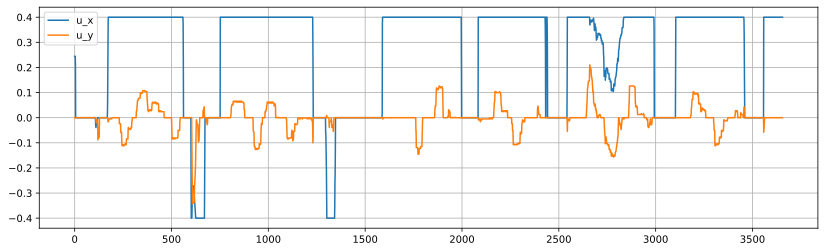

In [5]:
plt.figure(figsize=(14,4))
plt.plot(cmd_vels[:,0], label='u_x')
plt.plot(cmd_vels[:,1], label='u_y')
plt.grid(which='both')
plt.legend()
plt.show()

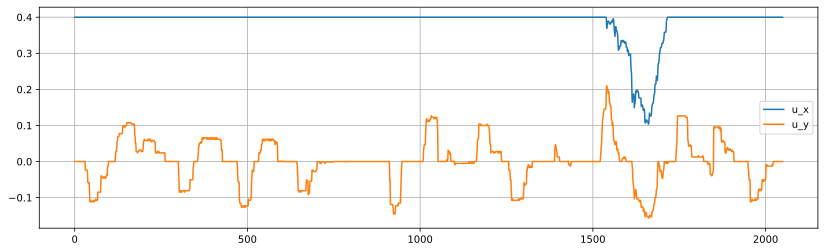

In [28]:
# for batch 1 (1-6)
# indices = list(range(40,350)) \
#   + list(range(650,950)) \
#   + list(range(1150,1450)) \
#   + list(range(1650,1950)) \
#   + list(range(1650,1950)) \
#   + list(range(2200,2550)) \
#   + list(range(2750,3100)) \
#   + list(range(3300,3600))

# for batch 2 (7-12)
indices = list(range(200,550)) \
  + list(range(800,1200)) \
  + list(range(1600,1950)) \
  + list(range(2100,2430)) \
  + list(range(2550,2970)) \
  + list(range(3200,3400))


plt.figure(figsize=(14,4))
plt.plot(cmd_vels[indices,0], label='u_x')
plt.plot(cmd_vels[indices,1], label='u_y')
plt.grid(which='both')
plt.legend()
plt.show()

In [29]:
np.savez_compressed('../data/obstacles2_cleaned.npz', 
                    color_images=color_images[indices], 
                    depth_images=depth_images[indices],
                    maps=maps[indices],
                    cmd_vels=cmd_vels[indices])

In [2]:
color_images=[]
depth_images=[]
maps=[]
cmd_vels=[]

for i in range(2):
  loaded = np.load(f'../data/obstacles{i+1}_cleaned.npz')
  
  color_images.append(loaded['color_images'])
  depth_images.append(loaded['depth_images'])
  maps.append(loaded['maps'])
  cmd_vels.append(loaded['cmd_vels'])
  
color_images = np.vstack(color_images)
depth_images = np.vstack(depth_images)
maps = np.expand_dims(np.vstack(maps), axis=-1)
cmd_vels = np.vstack(cmd_vels)

In [3]:
np.savez_compressed('../data/obstacles_cleaned_new.npz', 
                    color_images=color_images, 
                    depth_images=depth_images,
                    maps=maps,
                    cmd_vels=cmd_vels)